### Distribuições
  
Distribuições discretas:  https://en.wikipedia.org/wiki/List_of_probability_distributions
  - Uniform
  - Binomial
  - Multinomial
  - Poisson
  - Geométrica
  - Hipergeométrica
  - Binomial negativa
  
Distribuições contínuas: https://en.wikipedia.org/wiki/Probability_distribution#Continuous_probability_distribution
  - Uniform
  - Normal (gaussian)
  - Gamma (Exponential)
  - Beta
  - Logistic

and others

### Dica - um excelente site da Duke University

https://people.duke.edu/~ccc14/sta-663/UsingNumpySolutions.html

In [2]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### Uniform discrete distribution

- simétrica (e uniforme)

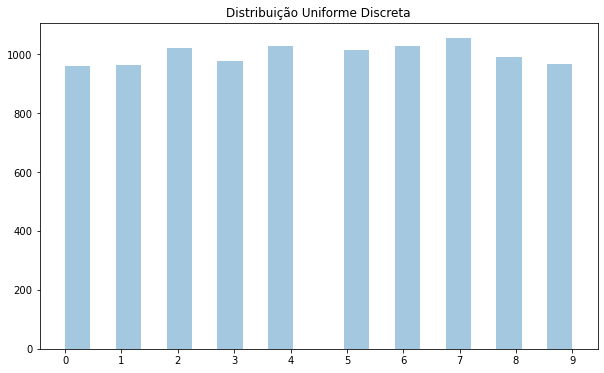

In [3]:
N = 10000
limSup = 10
nums = np.random.randint(0, limSup, N)

fig = plt.figure(figsize=(10,6))
ax = sns.distplot(nums, hist=True, kde=False)
ax.set_title("Distribuição Uniforme Discreta")
ax.set_xticks(np.arange(0, limSup));

### Distribuição uniforme de 0 a 1

10.0


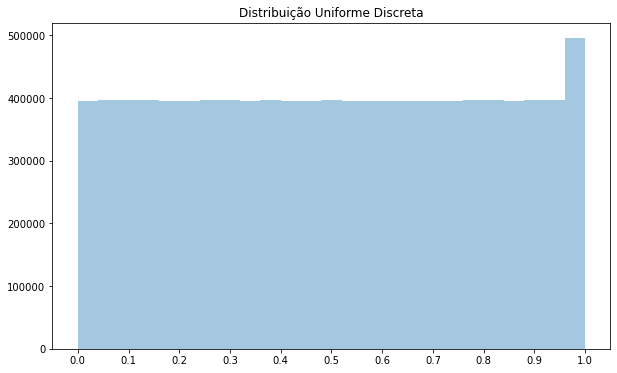

In [4]:
N = 10000000
limSup = 101
nums = [x/100 for x in np.random.randint(0, limSup, N)]
print(len(nums)/1000000)

xs = [x/100 for x in np.arange(0, limSup, 10)]

fig = plt.figure(figsize=(10,6))
ax = sns.distplot(nums, hist=True, bins=25, kde=False)
ax.set_title("Gráfico de Frequência - Uniforme Discreta")
ax.set_xticks(xs);

### Entendem a simetria analisando os números a seguir?

In [5]:
np.min(nums), np.median(nums), np.mean(nums), np.max(nums)

(0.0, 0.5, 0.4999416380000002, 1.0)

In [7]:
nums = np.array(nums)
type(nums)

numpy.ndarray

### Quantos números simulados (random) estão abaixo de 0.025 (2.5%)

In [10]:
0.025*100

2.5

In [12]:
np.sum(nums < 0.025), 0.025*N

(297396, 250000.0)

In [13]:
np.sum(nums < 0.025) / N

0.0297396

In [18]:
N = 1000000
nums = [x/limSup for x in np.random.randint(0, limSup, N)]
np.sum(np.array(nums) < 0.025) / N

0.029455

In [34]:
nums = [x/limSup for x in np.random.randint(0, limSup, N)]
np.sum(np.array(nums) < 0.1) / N

0.108786

In [41]:
nums = [x/limSup for x in np.random.randint(0, limSup, N)]
np.sum(np.array(nums) < 0.5) / N

0.504789

In [45]:
nums = [x/limSup for x in np.random.randint(0, limSup, N)]
np.sum(np.array(nums) < 0.9) / N

0.901208

In [24]:
np.sum(np.array(nums) > 0.975) / N

0.019791

### Boxplot de uma distribuição uniforme

### Distribuição Uniforme: media == mediana  e o gráfico é simétrico

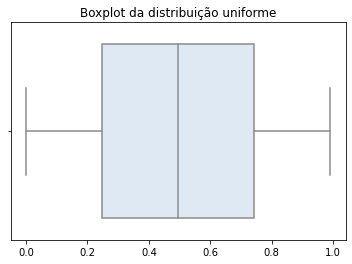

In [48]:
sns.set_palette("Blues")
ax = sns.boxplot(x=nums)
ret = plt.title("Boxplot da distribuição uniforme");

### Quero 2 gráficos com eixo x compartilhado ('alinhados')

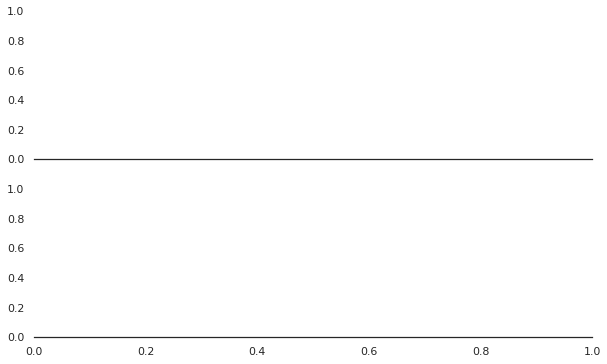

In [49]:
sns.set(style="white", palette="muted", color_codes=True)

# plt.subplots(2, 1 ...
#     subplots(2 linhas, 1 coluna)
f, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)
sns.despine(left=True)

um ao lado do outro  
seria 2 linhas e 1 coluna  

plt.subplots(1, 2 ....sharey=True)


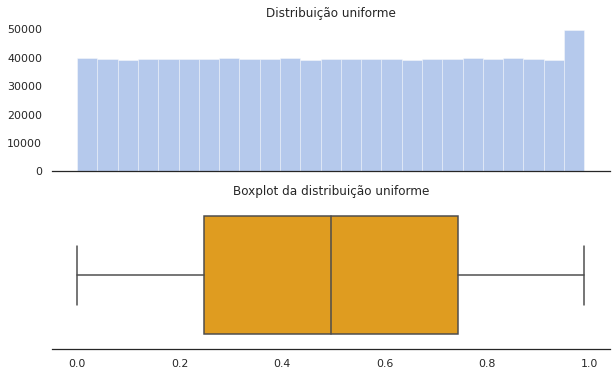

In [53]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)
sns.despine(left=True)

ax = sns.distplot(nums, hist=True, bins=25, kde=False, ax=axes[0])
ax.set_title("Distribuição uniforme")

ax = sns.boxplot(x=nums, ax=axes[1], color='orange')
ax.set_title("Boxplot da distribuição uniforme");

# plt.tight_layout()

## Distribuição binomial
  - binomial: sim / não, cara / coroa, mutou / não mutou
        
![binomial distribution](../figure/binomial_distribution.jpg)        

acertar 5 caras é muito difícil

0.5 * 0.5 * 0.5 * 0.5 * 0.5

0.5 ** 5

In [56]:
0.5 * 0.5 * 0.5 * 0.5 * 0.5, 0.5 ** 5, np.round( (0.5 ** 5)*100, 2)

(0.03125, 0.03125, 3.12)

### Se você jogar 2x seguindas e acertar 5 Caras

In [58]:
# muito raro: ~  1 / 1000
praro = 0.5 ** 5
0.5 * 0.5 * 0.5 * 0.5 * 0.5 * 0.5 * 0.5 * 0.5 * 0.5 * 0.5, praro*praro

(0.0009765625, 0.0009765625)

média deve ir para p*n = 500.00


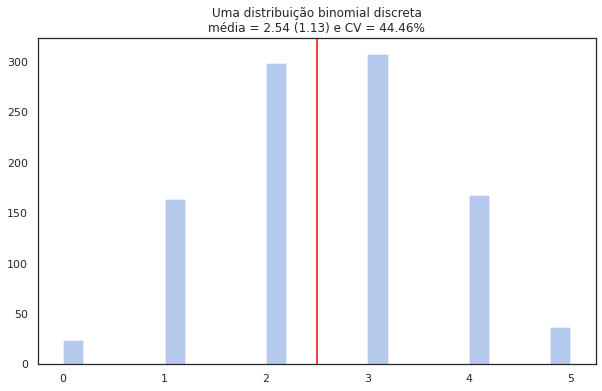

In [59]:
from scipy.stats import norm

n = 5    # moedas = [5C, 4C, .... 0C]
p = 0.5  # moedas não são viciadas p(cara) = p(coroa) = .5
N = 1000
jogo = np.random.binomial(n, p, N)

print("média deve ir para p*n = %.2f"%(p*N))

muj  = np.mean(jogo)
ssdj = np.std(jogo)
# coeficiente de variação = SD/media
vc = ssdj/muj

fig = plt.figure(figsize=(10,6))
# ax = sns.distplot(jogo, hist=True, kde=False, fit=norm)
ax = sns.distplot(jogo, hist=True, kde=False)
ax.axvline(n*p, color='red')
ax.set_title("Uma distribuição binomial discreta\nmédia = %.2f (%.2f) e CV = %.2f%%"%(muj, ssdj, vc*100));

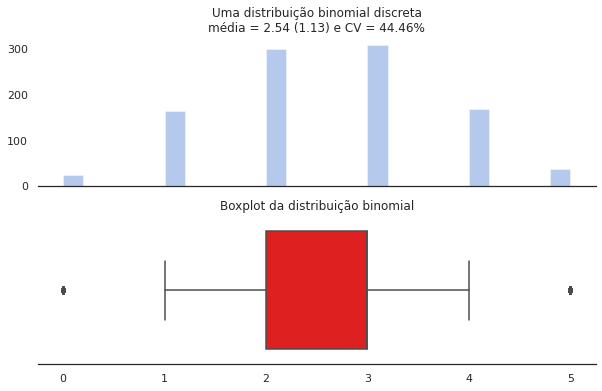

In [60]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)
sns.despine(left=True)

ax = sns.distplot(jogo, hist=True, kde=False, ax=axes[0])
ax.set_title("Uma distribuição binomial discreta\nmédia = %.2f (%.2f) e CV = %.2f%%"%(muj, ssdj, vc*100));

ax = sns.boxplot(x=jogo, ax=axes[1], color='red')
ax.set_title("Boxplot da distribuição binomial");


### Distribuição binomial, jogando moedas várias vezes

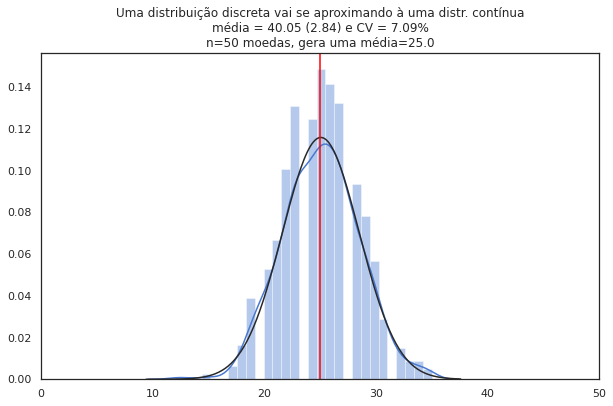

In [76]:
from scipy.stats import norm

n = 50   # 50 genes / alelos
p = 0.5  # moeda/alelo não viciado p(cara) = p(coroa) = .5
N = 1000
jogo = np.random.binomial(n, p, N)

title = "Uma distribuição discreta vai se aproximando à uma distr. contínua\nmédia = %.2f (%.2f) e CV = %.2f%%"%(muj, ssdj, vc*100)
title += "\nn=%d moedas, gera uma média=%.1f"%(n, n/2.)

muj  = np.mean(jogo)
medj = np.median(jogo)
ssdj = np.std(jogo)
vc = ssdj/muj

fig = plt.figure(figsize=(10,6))
ax = sns.distplot(jogo, hist=True, kde=True, fit=norm)
ax.axvline(n/2, color='red')
ax.set_title(title)
ax.set_xlim(0,50);

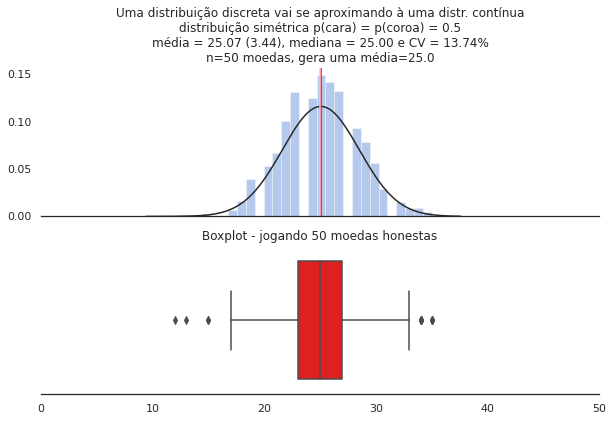

In [77]:
title = "Uma distribuição discreta vai se aproximando à uma distr. contínua\ndistribuição simétrica p(cara) = p(coroa) = 0.5"
title += "\nmédia = %.2f (%.2f), mediana = %.2f e CV = %.2f%%"%(muj, ssdj, medj, vc*100)
title += "\nn=%d moedas, gera uma média=%.1f"%(n, n/2.)

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)
sns.despine(left=True)

ax = sns.distplot(jogo, hist=True, kde=False, fit=norm, ax=axes[0])
ax.axvline(muj, color='red')
ax.axvline(25, color='pink')
ax.set_title(title)

ax = sns.boxplot(x=jogo, ax=axes[1], color='red')
ax.set_title("Boxplot - jogando %d moedas honestas"%(n));
# definir os limites do eixo x com set_xlim
ax.set_xlim(0,50);

### Moedas desonestas, distribuição assimétrica

(0.0, 50.0)

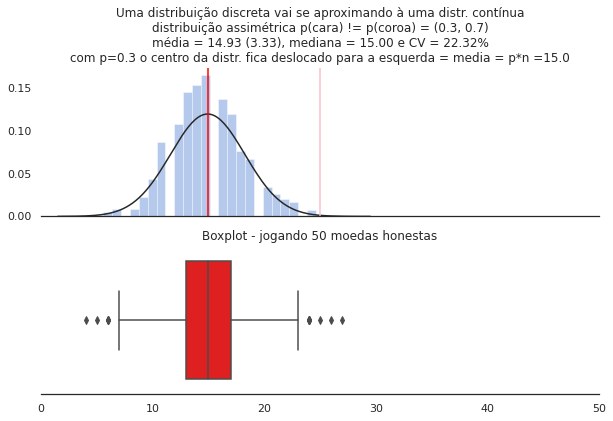

In [80]:
n = 50   # 50 genes / alelos
p = 0.3  # moeda/alelo viciado p(cara) != p(coroa)  (0.3, 0.7)
N = 1000
jogo = np.random.binomial(n, p, N)

muj  = np.mean(jogo)
medj = np.median(jogo)
ssdj = np.std(jogo)
vc = ssdj/muj


title = "Uma distribuição discreta vai se aproximando à uma distr. contínua\ndistribuição assimétrica p(cara) != p(coroa) = (%.1f, %.1f)"%(p, 1-p)
title += "\nmédia = %.2f (%.2f), mediana = %.2f e CV = %.2f%%"%(muj, ssdj, medj, vc*100)
title += "\ncom p=%.1f o centro da distr. fica deslocado para a esquerda = media = p*n =%.1f"%(p, p*n)

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)
sns.despine(left=True)

ax = sns.distplot(jogo, hist=True, kde=False, fit=norm, ax=axes[0])
ax.axvline(n/2, color='pink')
ax.axvline(p*n, color='red')
ax.set_title(title)

ax = sns.boxplot(x=jogo, ax=axes[1], color='red')
ax.set_title("Boxplot - jogando %d moedas honestas"%(n));
ax.set_xlim(0,50)

### Distribuição Normal (Gaussiana)

In [99]:
N = 100000
MU = 20; SD = 2
x = np.random.normal(MU, SD, N)

mu  = np.mean(x)
med = np.median(x)
ssd = np.std(x)
vc  = ssdj/muj

mu, med, ssd, vc

(19.99714526533835,
 20.003156484557778,
 2.0008752774330896,
 0.22317389339111604)

(11.993644155605992, 28.00064637507071)

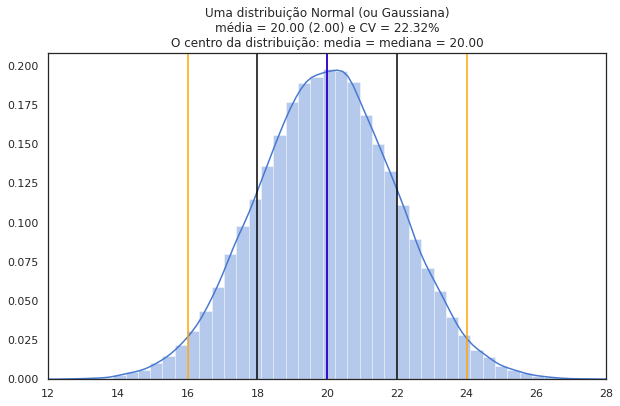

In [100]:
title = "Uma distribuição Normal (ou Gaussiana)\nmédia = %.2f (%.2f) e CV = %.2f%%"%(mu, ssd, vc*100)
title += "\nO centro da distribuição: media = mediana = %.2f"%(med)

fig = plt.figure(figsize=(10,6))
ax = sns.distplot(x, hist=True, kde=True)
ax.axvline(mu, color='red')
ax.axvline(med, color='blue')
ax.axvline(mu+1*ssd, color='black')
ax.axvline(mu-1*ssd, color='black')
ax.axvline(mu+2*ssd, color='orange')
ax.axvline(mu-2*ssd, color='orange')
ax.set_title(title)
ax.set_xlim(mu-4*ssd, mu+4*ssd)
# ax.set_xlim(19.5, 20.5)


### Quartis e Percentis

In [92]:
len(x), x

(100000,
 array([20.78072973, 19.34086347, 17.52492624, ..., 19.62877021,
        22.96916917, 22.46746016]))

### O que significa quartil? (quantile)
  - pegar 100% dividir por 4 (quartil)
  - se dividir por 100 - percentil
  
  - um quartil:
    - 1o quartil: 25% da população
    - 2o quartil: 50% da população (mediana)
    - 3o quartil: 75% da população
    
### Para calcular quartis preciso ordenar a série

In [101]:
x.sort() # ordenação
len(x), x, x[-10:-1]

(100000,
 array([11.38746673, 11.86101123, 11.90073949, ..., 28.15036444,
        28.94500349, 29.05835525]),
 array([27.5478425 , 27.59749007, 27.60371402, 27.75298077, 27.85791967,
        27.96224312, 28.07108028, 28.15036444, 28.94500349]))

In [102]:
np.min(x), np.median(x), np.max(x)

(11.387466731501451, 20.003156484557778, 29.058355248384174)

In [103]:
N, int(N/2)

(100000, 50000)

In [104]:
x[int(N/2)], x[int(N/2)-1], np.median(x)

(20.003178384432346, 20.003134584683206, 20.003156484557778)

### Primeiro quartil

In [105]:
x[int(N/4)]

18.64528735912085

### Segundo quartil = mediana

In [106]:
x[int(N/2)], np.median(x)

(20.003178384432346, 20.003156484557778)

### Terceiro quartil

In [107]:
x[int(3*N/4)]

21.344943168285287

### Função de quantiles no numpy

In [108]:
quartis = [0.25, 0.5, 0.75]
np.quantile(x, quartis)

array([18.64526644, 20.00315648, 21.34489588])

In [109]:
quartis = [0.025, 0.05, 0.25, 0.5, 0.75, 0.95, 0.975]
[np.round(x,2) for x in np.quantile(x, quartis)]

[16.09, 16.72, 18.65, 20.0, 21.34, 23.28, 23.9]

### Refazendo o boxplot e conferindo os quartis

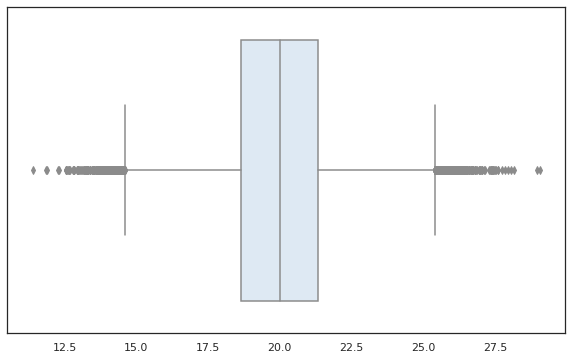

In [110]:
fig = plt.figure(figsize=(10,6))

sns.set_palette("Blues")
ax = sns.boxplot(x)

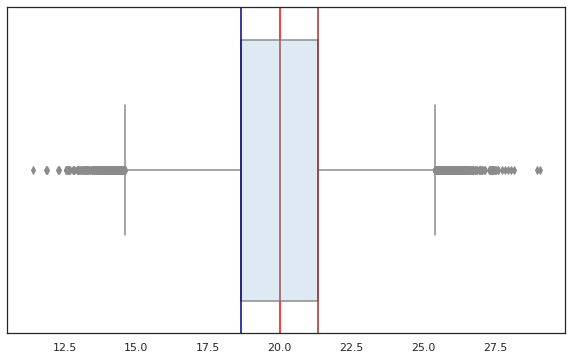

In [112]:
fig = plt.figure(figsize=(10,6))

sns.set_palette("Blues")

q1 = x[int(  N/4)]
q2 = x[int(  N/2)]
q3 = x[int(3*N/4)]

ax = sns.boxplot(x)
ax.axvline(q1, color='navy')
ax.axvline(q2, color='red')
ax.axvline(q3, color='brown')

### Como calcular o valor máximo e mínimo??

#### Primeiro defina distância IQ (iterquartil)

iq = q3 - q1

### Logo max e min são 1.5*IQ do 1o e do 3o quartil
  
min = q1 - 1.5 * iq  
max = q3 + 1.5 * iq  


In [113]:
iq = q3 - q1
_min = q1 - 1.5 * iq
_max = q3 + 1.5 * iq

_min, q1, q2, q3, _max

(14.595803645374195,
 18.64528735912085,
 20.003178384432346,
 21.344943168285287,
 25.394426882031944)

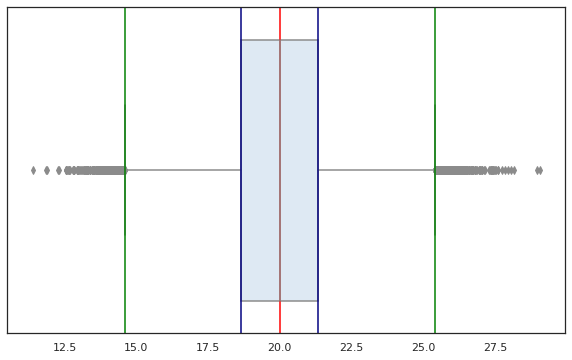

In [114]:
fig = plt.figure(figsize=(10,6))

sns.set_palette("Blues")

ax = sns.boxplot(x)
ax.axvline(q1, color='navy')
ax.axvline(q2, color='red')
ax.axvline(q3, color='navy')

ax.axvline(_min, color='green')
ax.axvline(_max, color='green');


### O que é um OUTLIER?

  - outlier é qualquer ponto acima do Máximo ou abaixo do Mínimo

In [115]:
type(x)

numpy.ndarray

In [118]:
len(x[x > _max]), "de", len(x)

(366, 'de', 100000)

In [119]:
len(x[x < _min])

351

### Como remover outliers?

In [122]:
# quais os elementos, e não True/False, o valor
# np.where(condição) = 0, 1, 2, 3, 4, 5 ...
np.where(x < _min)[0][:20]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [123]:
np.where(x > _max)[0][:20]

array([99634, 99635, 99636, 99637, 99638, 99639, 99640, 99641, 99642,
       99643, 99644, 99645, 99646, 99647, 99648, 99649, 99650, 99651,
       99652, 99653])

In [124]:
# eliminando os outliers superiores
xnew = np.delete(x,np.where(x > _max)[0])
np.sum(x >_max), np.sum(xnew >_max)

(366, 0)

### No pandas

pd.drop()

### Em muitas áreas prefere-se usar percentis

![curva de percentil de creiscimento](../figure/comprimento_x_idade_peso.gif)

### Ver
https://matplotlib.org/3.2.1/gallery/userdemo/annotate_text_arrow.html

### Distribuição Normal e seu boxplot

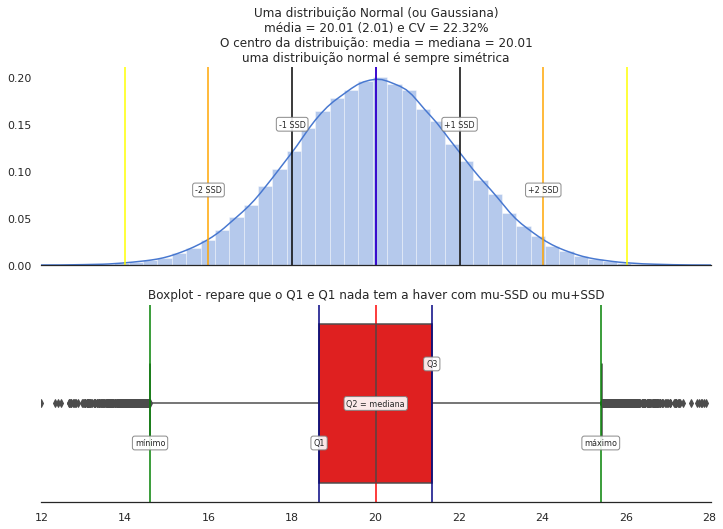

In [126]:
N = 100000
mu = 20; sd = 2
x = np.random.normal(mu, sd, N)

mu  = np.mean(x)
med = np.median(x)
ssd = np.std(x)
vc  = ssdj/muj

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

title = "Uma distribuição Normal (ou Gaussiana)\nmédia = %.2f (%.2f) e CV = %.2f%%"%(mu, ssd, vc*100)
title += "\nO centro da distribuição: media = mediana = %.2f"%(med)
title += "\numa distribuição normal é sempre simétrica"

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)
sns.despine(left=True)

ax = sns.distplot(x, hist=True, kde=True, ax=axes[0])
ax.axvline(mu, color='red')
ax.axvline(med, color='blue')
ax.axvline(mu+1*ssd, color='black')
ax.axvline(mu-1*ssd, color='black')
ax.axvline(mu+2*ssd, color='orange')
ax.axvline(mu-2*ssd, color='orange')
ax.axvline(mu+3*ssd, color='yellow')
ax.axvline(mu-3*ssd, color='yellow')
ax.set_title(title)
ax.set_xlim(mu-4*ssd, mu+4*ssd)

ax.text(mu+1*ssd, .15, "+1 SSD", ha="center", va="center", size=8, bbox=bbox_props)
ax.text(mu-1*ssd, .15, "-1 SSD", ha="center", va="center", size=8, bbox=bbox_props)

ax.text(mu+2*ssd, .08, "+2 SSD", ha="center", va="center", size=8, bbox=bbox_props)
ax.text(mu-2*ssd, .08, "-2 SSD", ha="center", va="center", size=8, bbox=bbox_props)


ax = sns.boxplot(x, ax=axes[1], color='red')
ax.axvline(q1, color='navy')
ax.axvline(q2, color='red')
ax.axvline(q3, color='navy')

ax.text(q1,  .2, "Q1",            ha="center", va="center", size=8, bbox=bbox_props)
ax.text(q2,   0, "Q2 = mediana", ha="center", va="center", size=8, bbox=bbox_props)
ax.text(q3, -.2, "Q3",            ha="center", va="center", size=8, bbox=bbox_props)

ax.text(_max, 0.2, "máximo", ha="center", va="center", size=8, bbox=bbox_props)
ax.text(_min, 0.2, "mínimo", ha="center", va="center", size=8, bbox=bbox_props)

ax.axvline(_min, color='green')
ax.axvline(_max, color='green');
ax.set_title("Boxplot - repare que o Q1 e Q1 nada tem a haver com mu-SSD ou mu+SSD");
# ax.set_xlim(0,50)

### O que é um evento raro?
  - Vamos supor uma distribuição de Altura, com média em 170 cm e SD = 20 cm
  - os 2.5% primeiros indivíduos devem ser bem baixos
  - os 2.5% últimos indivíduos devem ser bem altos
  - alpha = 5% - por ser bicaudal é 2.5% à esquerda, e 2.5% à direita
  - se fosse monocauldal, p.ex. para direita, pegaríamos os 5% últimos indivíduos
  
### Primeiro vamos montar a distribuição
### Depois vamos localizar indivíduos raros com valores próximos ao mínimo e máximo

<class 'scipy.stats._distn_infrastructure.rv_frozen'>
<class 'numpy.ndarray'> 10000


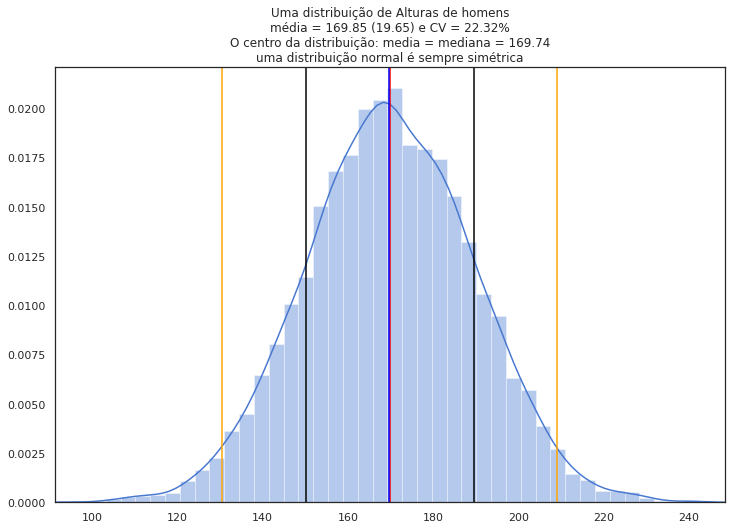

In [130]:
#-- montando a distribuição com média de 170 cm e SD de 20 cm

N = 10000
MU = 170; SD = 20

### função norm em stats
dist = stats.norm(MU, SD)
print(type(dist))
x = dist.rvs(N)  ## N random elements of dist
print(type(x), len(x))

mu  = np.mean(x)
med = np.median(x)
ssd = np.std(x)
vc  = ssdj/muj

title = "Uma distribuição de Alturas de homens\nmédia = %.2f (%.2f) e CV = %.2f%%"%(mu, ssd, vc*100)
title += "\nO centro da distribuição: media = mediana = %.2f"%(med)
title += "\numa distribuição normal é sempre simétrica"

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
fig = plt.figure(figsize=(12,8))

ax = sns.distplot(x, hist=True, kde=True)

ax.axvline(mu, color='red')
ax.axvline(med, color='blue')
ax.axvline(mu+1*ssd, color='black')
ax.axvline(mu-1*ssd, color='black')
ax.axvline(mu+2*ssd, color='orange')
ax.axvline(mu-2*ssd, color='orange')
ax.set_title(title)
ax.set_xlim(mu-4*ssd, mu+4*ssd);

### dada uma percentagem da área [0, 100]% stats devolve a altura limite

  - função: Percent point function
  - stats.norm.ppf( porc, media, SD)

In [131]:
## qual é a altura para a media/mediana?
x05   = stats.norm.ppf(0.5, loc=MU, scale=SD)  # Percent point function
x05

170.0

### Extremos para alpha=0.05 (lembra p-value ~ 5%)
  - Pessoas menores que 130.8 cm são raras
  - Pessoas acima   de  209.2 cm são raras

In [132]:
## qual é a altura para uma pessoa até 2.5% da área de distribuição
x0025 = stats.norm.ppf(0.025, loc=MU, scale=SD)

## qual é a altura para uma pessoa até 97.5% da área da distribuição
x0975 = stats.norm.ppf(0.975, loc=MU, scale=SD)

np.round(x0025,2), np.round(x0975, 2)

(130.8, 209.2)

### A função inversa é a Cumulativa

  - dada a distribuição dist
  - calcula-se a cumulativa:  dist.cdf(medida da altura)
  - obtém-se a probalidade de se achar uma pessoa até aquela altura

In [133]:
np.round(dist.cdf(130.8)*100, 2)

2.5

### Qual a probabilidade de se ter menos que 2.0 metros?

In [134]:
np.round(dist.cdf(200)*100, 2)

93.32

### Um complemento -->vou usar 1 - p

p(morrer) = 10%  
p(não morrer) = 1 - p(morrer) = 1 - 0.1 = 0.9  

porque?

p(morrer) + p(não morrer) = 1

### Qual a probabilidade de se ter mais que 2 metros de altura?

In [136]:
np.round((1 - dist.cdf(200))*100, 2)

6.68

### Valor limite inferior:  p(cumulativa < 2.5%)

In [138]:
x0025

130.8007203091989

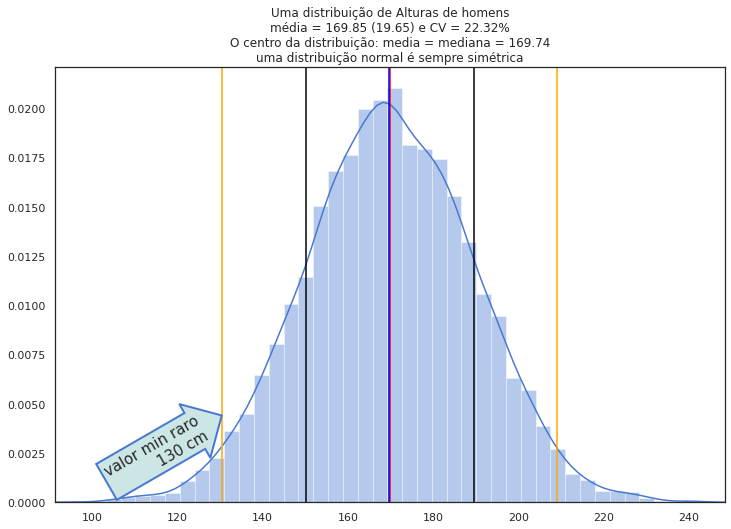

In [141]:
title = "Uma distribuição de Alturas de homens\nmédia = %.2f (%.2f) e CV = %.2f%%"%(mu, ssd, vc*100)
title += "\nO centro da distribuição: media = mediana = %.2f"%(med)
title += "\numa distribuição normal é sempre simétrica"

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
fig = plt.figure(figsize=(12,8))

ax = sns.distplot(x, hist=True, kde=True)
ax.axvline(mu, color='red')
ax.axvline(med, color='blue')
ax.axvline(mu+1*ssd, color='black')
ax.axvline(mu-1*ssd, color='black')
ax.axvline(mu+2*ssd, color='orange')
ax.axvline(mu-2*ssd, color='orange')
ax.set_title(title)
ax.set_xlim(mu-4*ssd, mu+4*ssd)

bbox_props = dict(boxstyle="rarrow", fc=(0.8, 0.9, 0.9), ec="b", lw=2)
#   ax.text(x    , y  ,    'mensagem')
t = ax.text(x0025-3, 0.0025, "valor min raro\n130 cm", ha="right", va="center", rotation=30,
            size=15,
            bbox=bbox_props)


### Exercício: fazer o mesmo gráfico para o limite superior: > 97.5%

### As densidades de probabilidades para cada altura [100, 110, ... 240]
### Probability density distribution

In [144]:
np.linspace(100, 240, 15)

array([100., 110., 120., 130., 140., 150., 160., 170., 180., 190., 200.,
       210., 220., 230., 240.])

In [145]:
np.arange(100, 241, 10)

array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240])

In [147]:
seqx = np.arange(100, 241, 10)

In [148]:
# funçaõ de densidade probalistica
dist.pdf(seqx)

array([4.36341348e-05, 2.21592421e-04, 8.76415025e-04, 2.69954833e-03,
       6.47587978e-03, 1.20985362e-02, 1.76032663e-02, 1.99471140e-02,
       1.76032663e-02, 1.20985362e-02, 6.47587978e-03, 2.69954833e-03,
       8.76415025e-04, 2.21592421e-04, 4.36341348e-05])

In [150]:
seqx

array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240])

### Cumulativa da distribuição normal

In [149]:
## esta função vai acumulando a área de acordo que vamos de 100 cm até mais de 200 cm de altura
dist.cdf(seqx)

array([2.32629079e-04, 1.34989803e-03, 6.20966533e-03, 2.27501319e-02,
       6.68072013e-02, 1.58655254e-01, 3.08537539e-01, 5.00000000e-01,
       6.91462461e-01, 8.41344746e-01, 9.33192799e-01, 9.77249868e-01,
       9.93790335e-01, 9.98650102e-01, 9.99767371e-01])

In [152]:
# prob de ser menor que 1.8 m
dist.cdf(180)

0.6914624612740131

In [153]:
# probabilidade de encontrar pessoas > 1.8
1 - dist.cdf(180)

0.3085375387259869

### Distribuição cumulativa

(91.24063104331812, 248.4687611420601)

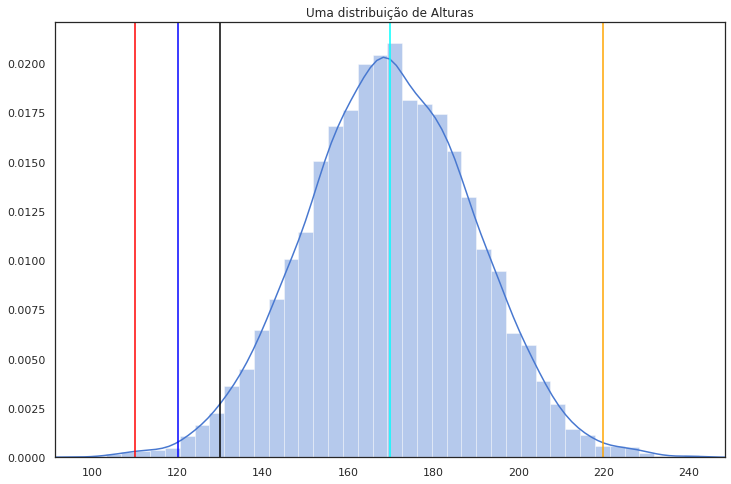

In [151]:
title = "Uma distribuição de Alturas"
sns.set(style="white", palette="muted", color_codes=True)
fig = plt.figure(figsize=(12,8))

ax = sns.distplot(x, hist=True, kde=True)
ax.axvline(110, color='red')
ax.axvline(120, color='blue')
ax.axvline(130, color='black')
ax.axvline(170, color='cyan')
ax.axvline(220, color='orange')
ax.set_title(title)
ax.set_xlim(mu-4*ssd, mu+4*ssd)

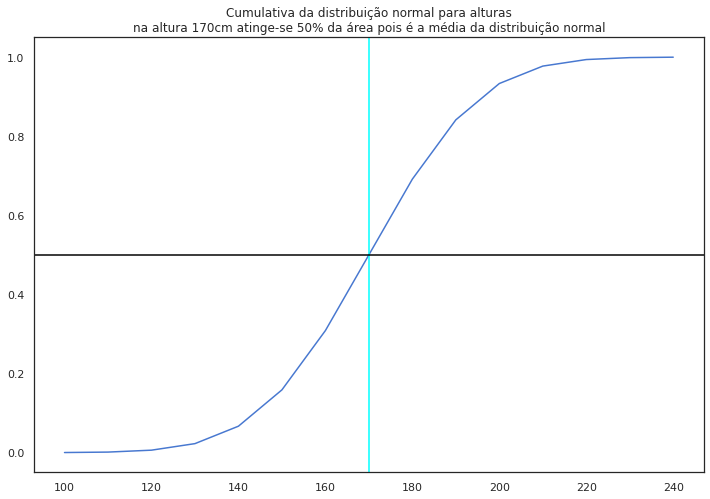

In [156]:
fig = plt.figure(figsize=(12,8))
plt.plot(seqx, dist.cdf(seqx))
plt.axvline(170, color='cyan')
plt.axhline(0.5, color='black')

title = "Cumulativa da distribuição normal para alturas"
title += '\nna altura 170cm atinge-se 50% da área pois é a média da distribuição normal'
plt.title(title);

### Como se lê este gráfico?
   - A cada altura da esquerda para a direita (alturas) vai se acumulando a área de 0 até o ponto desejado
   - Qual a probabilidade de se ter menos de 120 cm?
     - 0.62%, ou seja 

In [157]:
p = dist.cdf(120)*100
print("\nQual a probabilidade de se ter menos que 120 cm? %.2f%%"%(p))

p = dist.cdf(140)*100
print("\nQual a probabilidade de se ter menos que 140 cm? %.2f%%"%(p))


Qual a probabilidade de se ter menos que 120 cm? 0.62%

Qual a probabilidade de se ter menos que 140 cm? 6.68%


### Vamos automatizar e simular a cumulativa

In [159]:
seqx2 = np.arange(120, 241, 20)
seqx2

array([120, 140, 160, 180, 200, 220, 240])

In [160]:
for alt in seqx2:
    p = dist.cdf(alt)*100
    print("\nQual a probabilidade de se ter menos que %d cm? %.2f%%"%(alt, p))


Qual a probabilidade de se ter menos que 120 cm? 0.62%

Qual a probabilidade de se ter menos que 140 cm? 6.68%

Qual a probabilidade de se ter menos que 160 cm? 30.85%

Qual a probabilidade de se ter menos que 180 cm? 69.15%

Qual a probabilidade de se ter menos que 200 cm? 93.32%

Qual a probabilidade de se ter menos que 220 cm? 99.38%

Qual a probabilidade de se ter menos que 240 cm? 99.98%


### Qual probalidade de se ter mais que 1.75 metros?

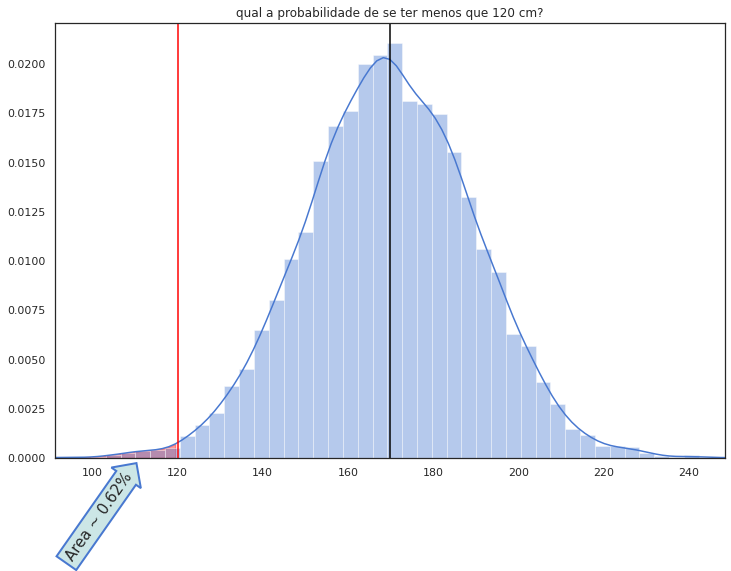

In [163]:
title = "Uma distribuição de Alturas"
title = "qual a probabilidade de se ter menos que 120 cm?"

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
fig = plt.figure(figsize=(12,8))

ax = sns.distplot(x, hist=True, kde=True)
ax.axvline(mu, color='black')
ax.set_title(title)

altura_desejada = 120
ax.axvline(altura_desejada, color='red')

# y = p(120)
y = dist.pdf(altura_desejada)

# Get the line from the axes to generate shading
l1 = ax.lines[0]

x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

nelem = np.sum(x1 <= altura_desejada)

x1 = x1[:nelem]
y1 = y1[:nelem]

ax.fill_between(x1,y1, color="red", alpha=0.4)

ax.set_xlim(mu-4*ssd, mu+4*ssd)

bbox_props = dict(boxstyle="rarrow", fc=(0.8, 0.9, 0.9), ec="b", lw=2)

area = dist.cdf(altura_desejada)*100

t = ax.text(110, -0.003, "Area ~ %.2f%%"%(area), ha="right", va="center", rotation=55, size=15, bbox=bbox_props)

### Violin plot

<AxesSubplot:>

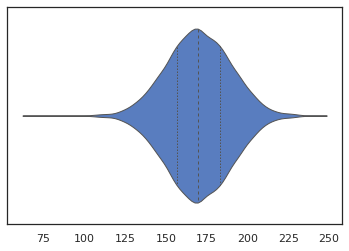

In [164]:
sns.violinplot(x, inner="quart", linewidth=1)

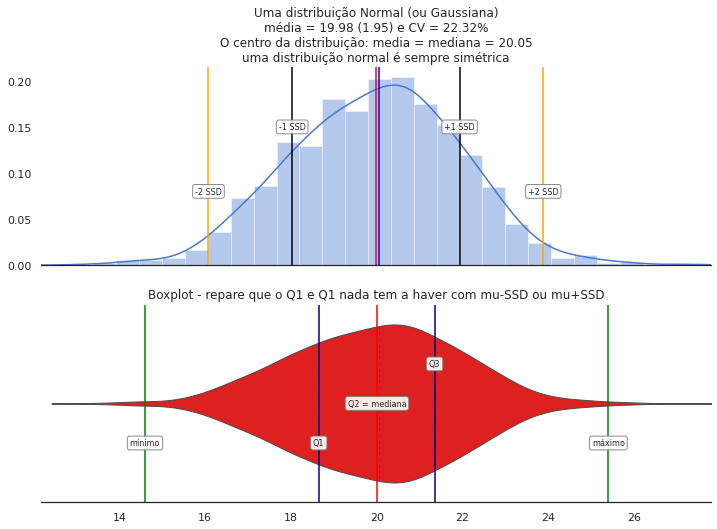

In [165]:
N = 1000
mu = 20; sd = 2
x = np.random.normal(mu, sd, N)

mu  = np.mean(x)
med = np.median(x)
ssd = np.std(x)
vc  = ssdj/muj

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

title = "Uma distribuição Normal (ou Gaussiana)\nmédia = %.2f (%.2f) e CV = %.2f%%"%(mu, ssd, vc*100)
title += "\nO centro da distribuição: media = mediana = %.2f"%(med)
title += "\numa distribuição normal é sempre simétrica"

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)
sns.despine(left=True)

ax = sns.distplot(x, hist=True, kde=True, ax=axes[0])
ax.axvline(mu, color='red')
ax.axvline(med, color='blue')
ax.axvline(mu+1*ssd, color='black')
ax.axvline(mu-1*ssd, color='black')
ax.axvline(mu+2*ssd, color='orange')
ax.axvline(mu-2*ssd, color='orange')
ax.set_title(title)
ax.set_xlim(mu-4*ssd, mu+4*ssd)

ax.text(mu+1*ssd, .15, "+1 SSD", ha="center", va="center", size=8, bbox=bbox_props)
ax.text(mu-1*ssd, .15, "-1 SSD", ha="center", va="center", size=8, bbox=bbox_props)

ax.text(mu+2*ssd, .08, "+2 SSD", ha="center", va="center", size=8, bbox=bbox_props)
ax.text(mu-2*ssd, .08, "-2 SSD", ha="center", va="center", size=8, bbox=bbox_props)


# ax = sns.boxplot(x, ax=axes[1], color='red')
ax = sns.violinplot(x, inner="quart", linewidth=1, ax=axes[1], color='red')

ax.axvline(q1, color='navy')
ax.axvline(q2, color='red')
ax.axvline(q3, color='navy')

ax.text(q1,  .2, "Q1",            ha="center", va="center", size=8, bbox=bbox_props)
ax.text(q2,   0, "Q2 = mediana", ha="center", va="center", size=8, bbox=bbox_props)
ax.text(q3, -.2, "Q3",            ha="center", va="center", size=8, bbox=bbox_props)

ax.text(_max, 0.2, "máximo", ha="center", va="center", size=8, bbox=bbox_props)
ax.text(_min, 0.2, "mínimo", ha="center", va="center", size=8, bbox=bbox_props)

ax.axvline(_min, color='green')
ax.axvline(_max, color='green');
ax.set_title("Boxplot - repare que o Q1 e Q1 nada tem a haver com mu-SSD ou mu+SSD");
# ax.set_xlim(0,50)

### Violin plot + jitter (mostrar os pontos)

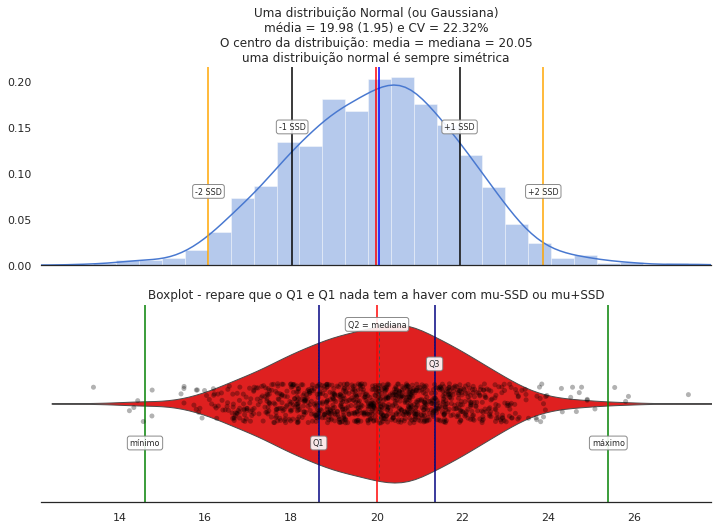

In [166]:
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

title = "Uma distribuição Normal (ou Gaussiana)\nmédia = %.2f (%.2f) e CV = %.2f%%"%(mu, ssd, vc*100)
title += "\nO centro da distribuição: media = mediana = %.2f"%(med)
title += "\numa distribuição normal é sempre simétrica"

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)
sns.despine(left=True)

ax = sns.distplot(x, hist=True, kde=True, ax=axes[0])
ax.axvline(mu, color='red')
ax.axvline(med, color='blue')
ax.axvline(mu+1*ssd, color='black')
ax.axvline(mu-1*ssd, color='black')
ax.axvline(mu+2*ssd, color='orange')
ax.axvline(mu-2*ssd, color='orange')
ax.set_title(title)
ax.set_xlim(mu-4*ssd, mu+4*ssd)

ax.text(mu+1*ssd, .15, "+1 SSD", ha="center", va="center", size=8, bbox=bbox_props)
ax.text(mu-1*ssd, .15, "-1 SSD", ha="center", va="center", size=8, bbox=bbox_props)

ax.text(mu+2*ssd, .08, "+2 SSD", ha="center", va="center", size=8, bbox=bbox_props)
ax.text(mu-2*ssd, .08, "-2 SSD", ha="center", va="center", size=8, bbox=bbox_props)

ax = sns.violinplot(x, inner="quart", linewidth=1, ax=axes[1], color='red')
ax = sns.stripplot(x, ax=axes[1], color='black', alpha=.3)

ax.axvline(q1, color='navy')
ax.axvline(q2, color='red')
ax.axvline(q3, color='navy')

ax.text(q1,  .2, "Q1",            ha="center", va="center", size=8, bbox=bbox_props)
ax.text(q2, -.4, "Q2 = mediana", ha="center", va="center", size=8, bbox=bbox_props)
ax.text(q3, -.2, "Q3",            ha="center", va="center", size=8, bbox=bbox_props)

ax.text(_max, 0.2, "máximo", ha="center", va="center", size=8, bbox=bbox_props)
ax.text(_min, 0.2, "mínimo", ha="center", va="center", size=8, bbox=bbox_props)

ax.axvline(_min, color='green')
ax.axvline(_max, color='green');
ax.set_title("Boxplot - repare que o Q1 e Q1 nada tem a haver com mu-SSD ou mu+SSD");
# ax.set_xlim(0,50)